# Classification
So far the examples used so far have been for linear regression models, however, this notebook will examine the same setup and look at a classification example to see how accurate the method is

In [1]:
import math
import warnings

from typing import List, Dict
from statistics import mean, stdev
from random import randint

import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

warnings.filterwarnings("ignore")

matplotlib.rcParams["animation.embed_limit"] = 2**128
matplotlib.rcParams["figure.dpi"] = 300

## Generating data

In [2]:
SAMPLES = 5000

In [3]:
base = [
    [randint(1, 100) for _ in range(SAMPLES)],
    [20 for _ in range(SAMPLES)],
    [2 for _ in range(SAMPLES)]
]
res = []
zeros = 0
ones = 0
for i in base[0]:
    if i * 2 + 20 < 123:
        res.append(0)
        zeros += 1
    else:
        res.append(1)
        ones += 1
print(zeros)
print(ones)

2567
2433


In [4]:
noise = [randint(1,250) for _ in range(SAMPLES)]

In [5]:
data = {}
data["ms"] = base[0]
data["xs"] = base[1]
data["cs"] = base[2]
data["noise"] = noise
data["ys"] = res

In [6]:
df = pd.DataFrame(data)
df.head(5)

,ms,xs,cs,noise,ys
0,61,20,2,111,1
1,67,20,2,98,1
2,30,20,2,154,0
3,51,20,2,208,0
4,24,20,2,205,0


In [7]:
split = 500

train = df.iloc[split:]
test = df.iloc[:split]
train.shape, test.shape

((4500, 5), (500, 5))

In [8]:
X_train = train[["ms", "xs", "cs", "noise"]]
y_train = train["ys"]
X_test = test[["ms", "xs", "cs", "noise"]]
y_test = test["ys"]

## Defining Model

In [9]:
FIRST_LAYER = 10
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(FIRST_LAYER, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-12-04 23:54:05.501306: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-04 23:54:05.501485: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
def create_history(columns: int, nodes: int) -> Dict:
    return {i:{j: [] for j in range(nodes)} for i in range(columns)}

In [11]:
history = create_history(len(X_train.columns), FIRST_LAYER)

In [12]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(
      x=X_train, 
      y=y_train, 
      epochs=1,
      batch_size=100,
    )
    all_weights = model.layers[0].get_weights()[0].tolist()
    for column in range(len(all_weights)):
        for node in range(len(all_weights[column])):
            history[column][node].append(all_weights[column][node])

RUNNING EPOCH 1


2022-12-04 23:54:05.756189: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/45 [..............................] - ETA: 19s - loss: 11.5502 - accuracy: 0.4900

2022-12-04 23:54:06.033726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 1s 6ms/step - loss: 5.8372 - accuracy: 0.4147
RUNNING EPOCH 2
45/45 [==============================] - 0s 7ms/step - loss: 0.5156 - accuracy: 0.7609
RUNNING EPOCH 3
45/45 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.8802
RUNNING EPOCH 4
45/45 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.8849
RUNNING EPOCH 5
45/45 [==============================] - 0s 6ms/step - loss: 0.2432 - accuracy: 0.8909
RUNNING EPOCH 6
45/45 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.9027
RUNNING EPOCH 7
45/45 [==============================] - 0s 6ms/step - loss: 0.2045 - accuracy: 0.9129
RUNNING EPOCH 8
45/45 [==============================] - 0s 5ms/step - loss: 0.1869 - accuracy: 0.9282
RUNNING EPOCH 9
45/45 [==============================] - 0s 5ms/step - loss: 0.1693 - accuracy: 0.9378
RUNNING EPOCH 10
45/45 [==============================] - 0s 5ms/step - loss: 0.1523 - ac

## Evaluating Model

In [13]:
X_test.head()

,ms,xs,cs,noise
0,61,20,2,111
1,67,20,2,98
2,30,20,2,154
3,51,20,2,208
4,24,20,2,205


In [14]:
res_ms = X_test["ms"].values.tolist()
res_xs = X_test["xs"].values.tolist()
res_cs = X_test["cs"].values.tolist()
res_noise = X_test["noise"].values.tolist()
res_pred = [
    round(i) for i in model.predict(X_test).flatten().tolist()
]
res = {
    "ms": res_ms,
    "xs": res_xs,
    "cs": res_cs,
    "noise": res_noise,
    "ys": y_test,
    "pred": res_pred
}

res = pd.DataFrame(res)
res

16/16 [==============================] - 0s 3ms/step


2022-12-04 23:56:29.588525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,ms,xs,cs,noise,ys,pred
0,61,20,2,111,1,1
1,67,20,2,98,1,1
2,30,20,2,154,0,0
3,51,20,2,208,0,0
4,24,20,2,205,0,0
...,...,...,...,...,...,...
495,98,20,2,80,1,1
496,99,20,2,189,1,1
497,62,20,2,202,1,1
498,7,20,2,11,0,0


In [15]:
expected = list(res["ys"].values)
actual = list(res["pred"].values)
accuracies = []
for i in range(len(expected)):
    if expected[i] > actual[i]:
        accuracies.append((actual[i] / expected[i]) * 100)
    elif expected[i] < actual[i]:
        accuracies.append((expected[i] / actual[i]) * 100)
    else:
        accuracies.append(100)
print(f"The model is correct to {round(mean(accuracies), 5)}%")

The model is correct to 100%


## Colors
Setting some nice colors for our following plots

In [16]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

## Splitting weights into groups

In [17]:
def get_groups(index: int, nodes: int) -> List:
    group = []
    for i in range(nodes):
        group.append(history[index][i])
    return group

In [18]:
NODES = 10
ms = get_groups(0, NODES)
xs = get_groups(1, NODES)
cs = get_groups(2, NODES)
noises = get_groups(3, NODES)

## Box Plots

In [19]:
def generate_box_plot(
    ax,
    data: List,
    color: str,
    label: str,
    position_offset: int = 0,
    showfliers: bool = False
):
    ax.set_xlabel("Input Column and Node Number")
    ax.set_ylabel("Weight Values")
    color = {"color": color}
    ax.boxplot(
        data,
        positions=[i + position_offset for i in range(1,11)],
        boxprops=color,
        medianprops=color,
        whiskerprops=color,
        capprops=color,
        flierprops={"markeredgecolor": other},
        showfliers=showfliers,
        labels = [f"{label}{i}" for i in range(1,11)]
    )
   

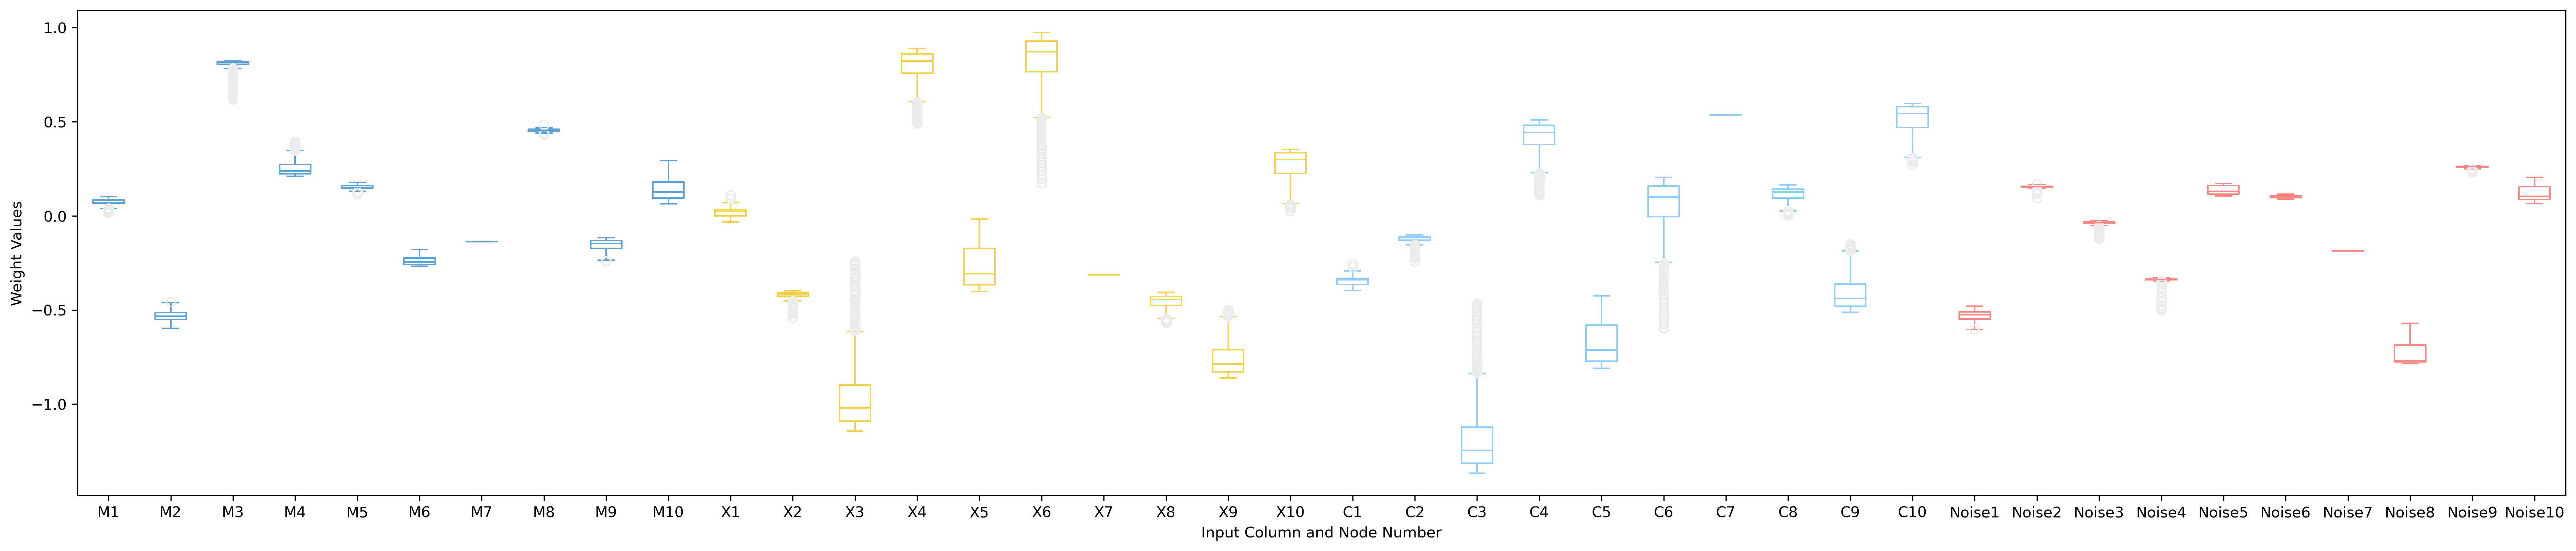

In [20]:
fig, ax = plt.subplots(figsize=(30,6))

generate_box_plot(ax, ms, darker, "M", showfliers=True)
generate_box_plot(ax, xs, important, "X", 10, showfliers=True)
generate_box_plot(ax, cs, light, "C", 20, showfliers=True)
generate_box_plot(ax, noises, noise, "Noise", 30, showfliers=True)

## Standard Deviation

In [21]:
data = {
    "m_one": ms[0],
    "m_two": ms[1],
    "m_three": ms[2],
    "m_four": ms[3],
    "m_five": ms[4],
    "m_six": ms[5],
    "m_seven": ms[6],
    "m_eight": ms[7],
    "m_nine": ms[8],
    "m_ten": ms[9],
    "x_one": xs[0],
    "x_two": xs[1],
    "x_three": xs[2],
    "x_four": xs[3],
    "x_five": xs[4],
    "x_six": xs[5],
    "x_seven": xs[6],
    "x_eight": xs[7],
    "x_nine": xs[8],
    "x_ten": xs[9],
    "c_one": cs[0],
    "c_two": cs[1],
    "c_three": cs[2],
    "c_four": cs[3],
    "c_five": cs[4],
    "c_six": cs[5],
    "c_seven": cs[6],
    "c_eight": cs[7],
    "c_nine": cs[8],
    "c_ten": cs[9],
    "noise_one": noises[0],
    "noise_two": noises[1],
    "noise_three": noises[2],
    "noise_four": noises[3],
    "noise_five": noises[4],
    "noise_six": noises[5],
    "noise_seven": noises[6],
    "noise_eight": noises[7],
    "noise_nine": noises[8],
    "noise_ten": noises[9],
}

columns = [
    "m_one",
    "m_two",
    "m_three",
    "m_four",
    "m_five",
    "m_six",
    "m_seven",
    "m_eight",
    "m_nine",
    "m_ten",
    "x_one",
    "x_two",
    "x_three",
    "x_four",
    "x_five",
    "x_six",
    "x_seven",
    "x_eight",
    "x_nine",
    "x_ten",
    "c_one",
    "c_two",
    "c_three",
    "c_four",
    "c_five",
    "c_six",
    "c_seven",
    "c_eight",
    "c_nine",
    "c_ten",
    "noise_one",
    "noise_two",
    "noise_three",
    "noise_four",
    "noise_five",
    "noise_six",
    "noise_seven",
    "noise_eight",
    "noise_nine",
    "noise_ten"
]


odf = pd.DataFrame(data)
odf.head(5)

,m_one,m_two,m_three,m_four,m_five,m_six,m_seven,m_eight,m_nine,m_ten,...,noise_one,noise_two,noise_three,noise_four,noise_five,noise_six,noise_seven,noise_eight,noise_nine,noise_ten
0,0.043479,-0.596996,0.630741,0.362427,0.116895,-0.256074,-0.136408,0.483690,-0.242108,0.293049,...,-0.576799,0.096806,-0.116621,-0.478153,0.172410,0.098333,-0.18688,-0.571798,0.239692,0.193355
1,0.045970,-0.572443,0.620425,0.364724,0.118493,-0.246095,-0.136408,0.463858,-0.244041,0.289901,...,-0.579785,0.115769,-0.121174,-0.480536,0.162896,0.113977,-0.18688,-0.596471,0.232057,0.202486
2,0.035335,-0.568145,0.629738,0.346143,0.118171,-0.247730,-0.136408,0.462556,-0.239598,0.294287,...,-0.593644,0.117742,-0.117669,-0.497052,0.162517,0.114967,-0.18688,-0.600337,0.232903,0.203966
3,0.031981,-0.563072,0.638941,0.341797,0.120211,-0.247404,-0.136408,0.457627,-0.234847,0.291999,...,-0.595961,0.119754,-0.111687,-0.501791,0.162484,0.115283,-0.18688,-0.606293,0.234258,0.204433
4,0.028871,-0.558614,0.646565,0.340983,0.122394,-0.247471,-0.136408,0.454042,-0.229441,0.289647,...,-0.597634,0.121491,-0.104789,-0.500258,0.162546,0.114799,-0.18688,-0.610801,0.235969,0.204803


In [22]:
std_df = odf.std().to_frame()
mean_df = odf.mean().to_frame()
std_df.columns = ["Std"]
mean_df.columns = ["Mean"]
merged_df = pd.merge(std_df, mean_df, left_index=True, right_index=True)

''

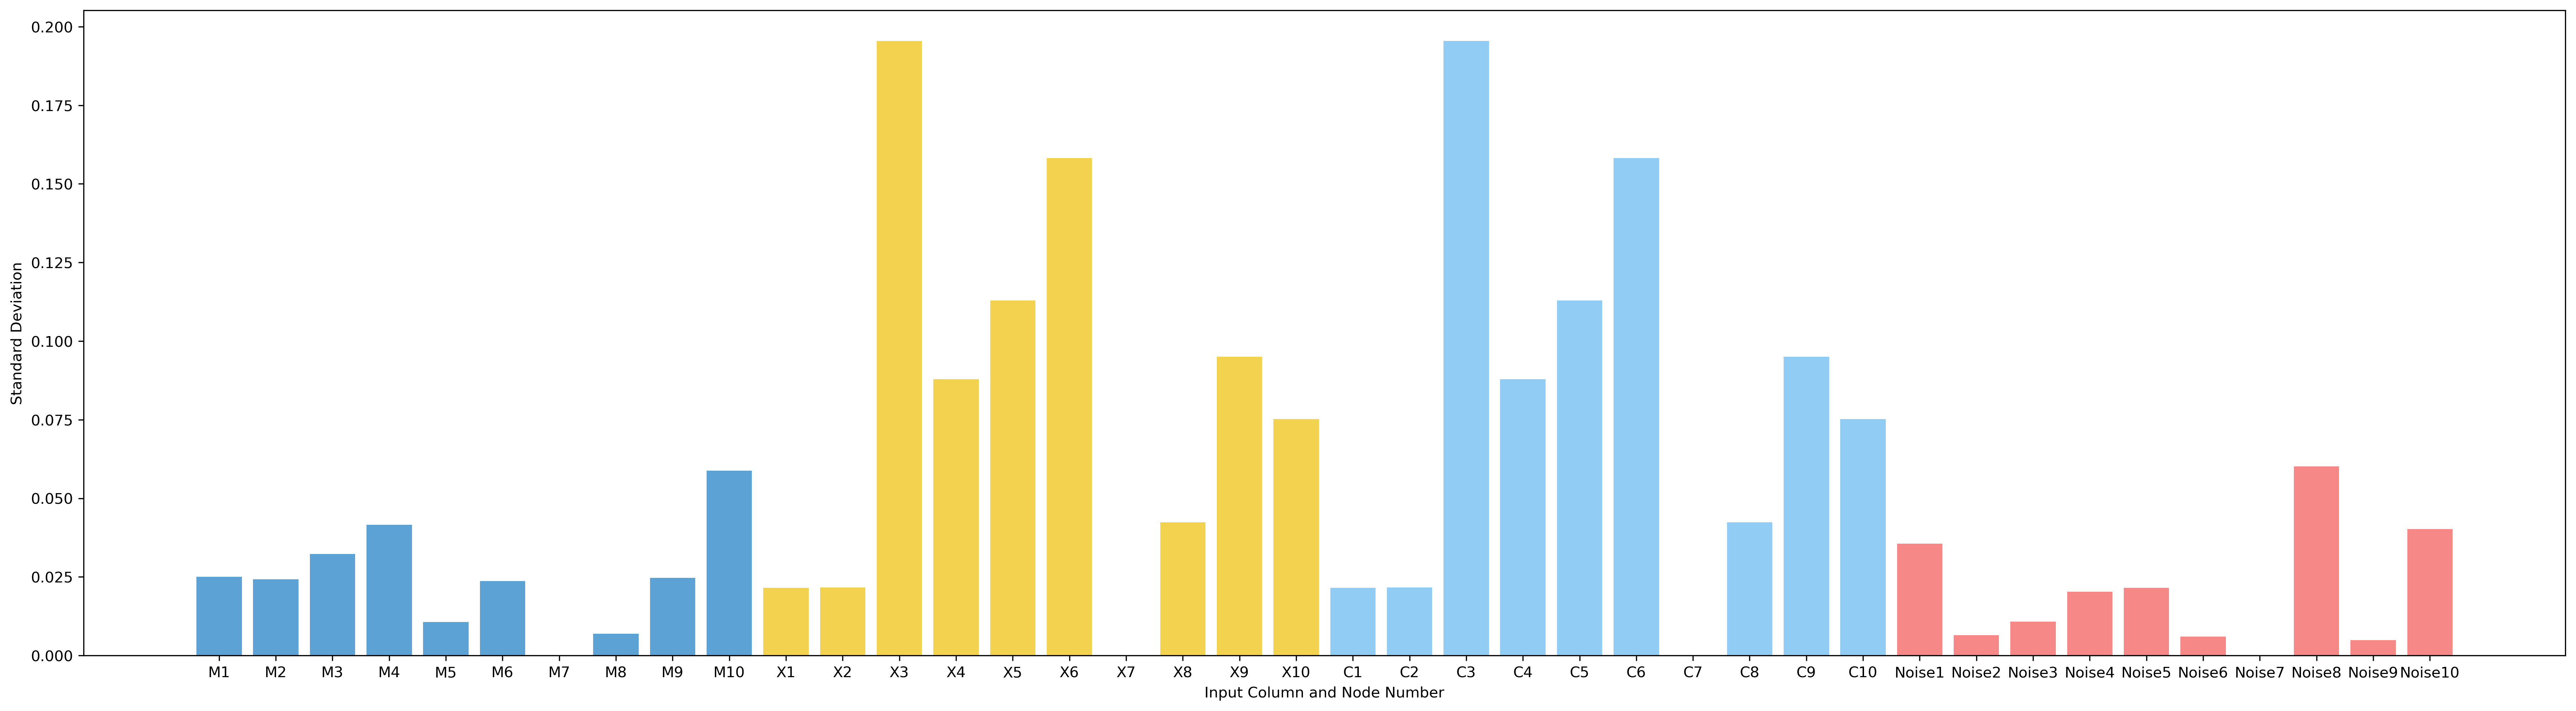

In [23]:
fig, ax = plt.subplots(figsize=(30, 8))
ax.bar(
    [
        "M1",
        "M2",
        "M3",
        "M4",
        "M5",
        "M6",
        "M7",
        "M8",
        "M9",
        "M10",
        "X1",
        "X2",
        "X3",
        "X4",
        "X5",
        "X6",
        "X7",
        "X8",
        "X9",
        "X10",
        "C1",
        "C2",
        "C3",
        "C4",
        "C5",
        "C6",
        "C7",
        "C8",
        "C9",
        "C10",
        "Noise1",
        "Noise2",
        "Noise3",
        "Noise4",
        "Noise5",
        "Noise6",
        "Noise7",
        "Noise8",
        "Noise9",
        "Noise10",
    ],
    [
        std_df["Std"].loc["m_one"],
        std_df["Std"].loc["m_two"],
        std_df["Std"].loc["m_three"],
        std_df["Std"].loc["m_four"],
        std_df["Std"].loc["m_five"],
        std_df["Std"].loc["m_six"],
        std_df["Std"].loc["m_seven"],
        std_df["Std"].loc["m_eight"],
        std_df["Std"].loc["m_nine"],
        std_df["Std"].loc["m_ten"],
        std_df["Std"].loc["x_one"],
        std_df["Std"].loc["x_two"],
        std_df["Std"].loc["x_three"],
        std_df["Std"].loc["x_four"],
        std_df["Std"].loc["x_five"],
        std_df["Std"].loc["x_six"],
        std_df["Std"].loc["x_seven"],
        std_df["Std"].loc["x_eight"],
        std_df["Std"].loc["x_nine"],
        std_df["Std"].loc["x_ten"],
        std_df["Std"].loc["c_one"],
        std_df["Std"].loc["c_two"],
        std_df["Std"].loc["c_three"],
        std_df["Std"].loc["c_four"],
        std_df["Std"].loc["c_five"],
        std_df["Std"].loc["c_six"],
        std_df["Std"].loc["c_seven"],
        std_df["Std"].loc["c_eight"],
        std_df["Std"].loc["c_nine"],
        std_df["Std"].loc["c_ten"],
        std_df["Std"].loc["noise_one"],
        std_df["Std"].loc["noise_two"],
        std_df["Std"].loc["noise_three"],
        std_df["Std"].loc["noise_four"],
        std_df["Std"].loc["noise_five"],
        std_df["Std"].loc["noise_six"],
        std_df["Std"].loc["noise_seven"],
        std_df["Std"].loc["noise_eight"],
        std_df["Std"].loc["noise_nine"],
        std_df["Std"].loc["noise_ten"],
    ],
    color=[
        darker,
        darker,
        darker,
        darker,
        darker,
        darker,
        darker,
        darker,
        darker,
        darker,
        important,
        important,
        important,
        important,
        important,
        important,
        important,
        important,
        important,
        important,
        light,
        light,
        light,
        light,
        light,
        light,
        light,
        light,
        light,
        light,
        noise,
        noise,
        noise,
        noise,
        noise,
        noise,
        noise,
        noise,
        noise,
        noise,
    ],
)
ax.set_xlabel("Input Column and Node Number")
ax.set_ylabel("Standard Deviation")
;

In [24]:
g_ms = sum(
    [
        std_df["Std"].loc["m_one"],
        std_df["Std"].loc["m_two"],
        std_df["Std"].loc["m_three"],
        std_df["Std"].loc["m_four"],
        std_df["Std"].loc["m_five"],
        std_df["Std"].loc["m_six"],
        std_df["Std"].loc["m_seven"],
        std_df["Std"].loc["m_eight"],
        std_df["Std"].loc["m_nine"],
        std_df["Std"].loc["m_ten"],
    ]
)
g_xs = sum(
    [
        std_df["Std"].loc["x_one"],
        std_df["Std"].loc["x_two"],
        std_df["Std"].loc["x_three"],
        std_df["Std"].loc["x_four"],
        std_df["Std"].loc["x_five"],
        std_df["Std"].loc["x_six"],
        std_df["Std"].loc["x_seven"],
        std_df["Std"].loc["x_eight"],
        std_df["Std"].loc["x_nine"],
        std_df["Std"].loc["x_ten"],
    ]
)
g_cs = sum(
    [
        std_df["Std"].loc["c_one"],
        std_df["Std"].loc["c_two"],
        std_df["Std"].loc["c_three"],
        std_df["Std"].loc["c_four"],
        std_df["Std"].loc["c_five"],
        std_df["Std"].loc["c_six"],
        std_df["Std"].loc["c_seven"],
        std_df["Std"].loc["c_eight"],
        std_df["Std"].loc["c_nine"],
        std_df["Std"].loc["c_ten"],
    ]
)
g_noises = sum(
    [
        std_df["Std"].loc["noise_one"],
        std_df["Std"].loc["noise_two"],
        std_df["Std"].loc["noise_three"],
        std_df["Std"].loc["noise_four"],
        std_df["Std"].loc["noise_five"],
        std_df["Std"].loc["noise_six"],
        std_df["Std"].loc["noise_seven"],
        std_df["Std"].loc["noise_eight"],
        std_df["Std"].loc["noise_nine"],
        std_df["Std"].loc["noise_ten"],
    ]
)

''

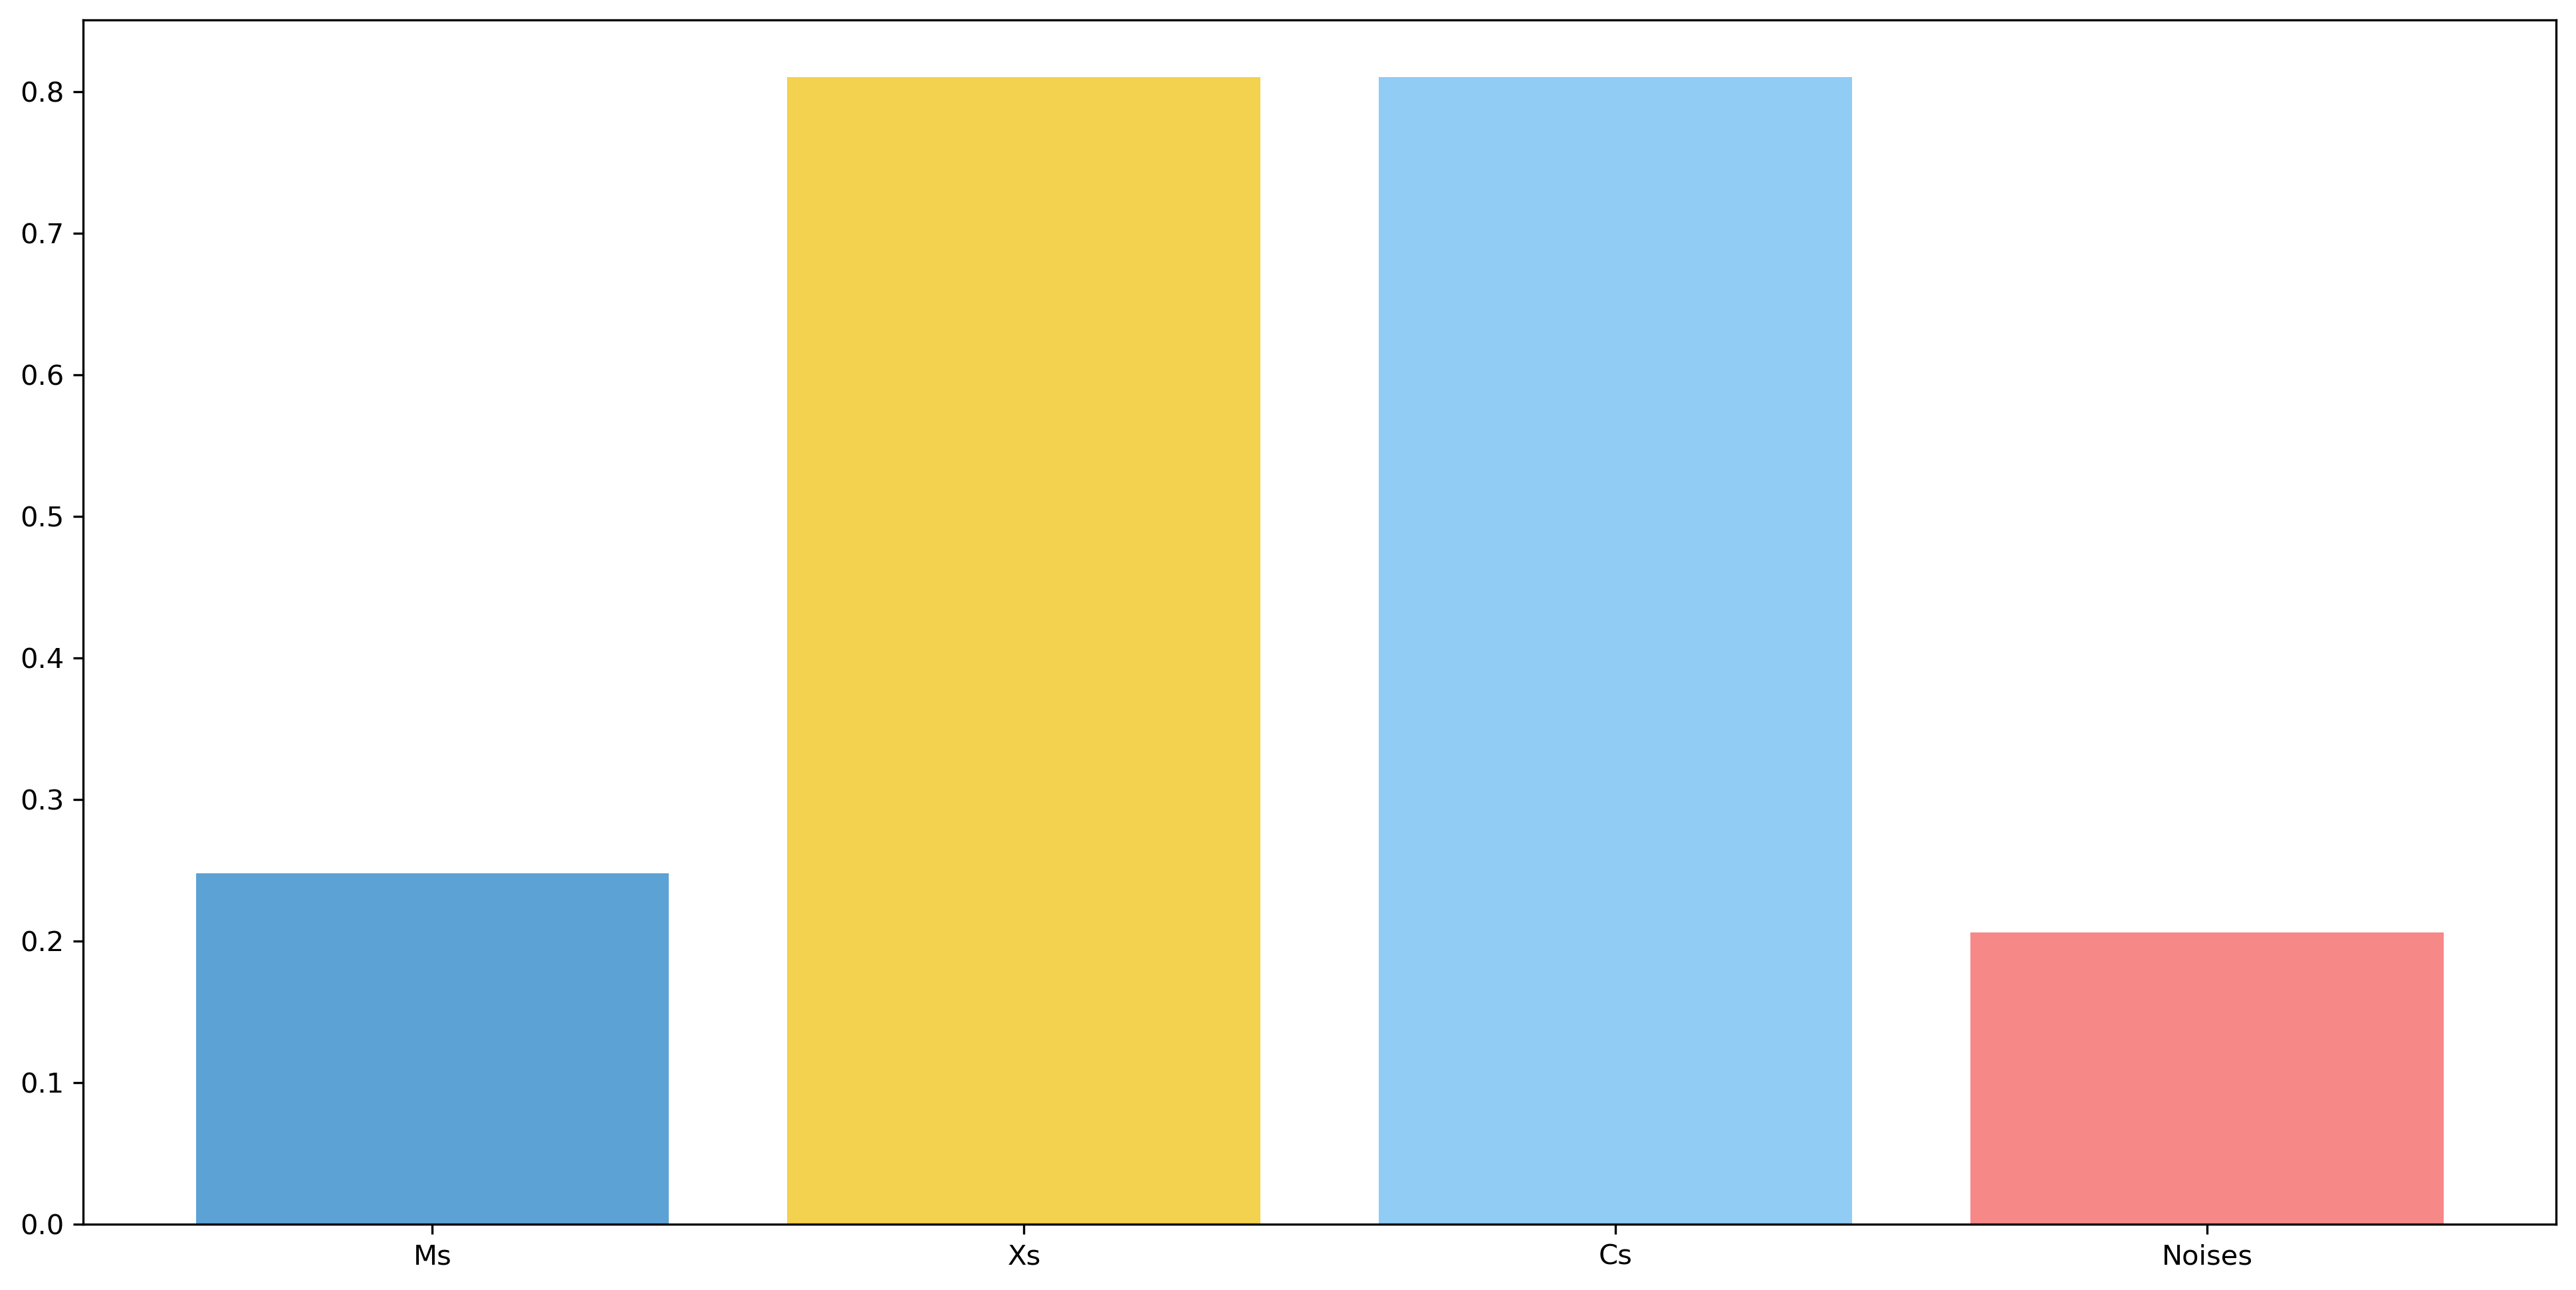

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(
    ["Ms", "Xs", "Cs", "Noises"],
    [g_ms, g_xs, g_cs, g_noises],
    color=[darker, important, light, noise],
)
;

## Probability Densities

In [26]:
def plot_pds(group):
    _, ax = plt.subplots(figsize=(16,6))
    domain = np.linspace(-2,2,2000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    colors = [darker, important, light, noise]

    for mu, std, color in zip(means, stds, colors):
        probs = norm.pdf(domain, mu, std)
        ax.plot(domain, probs, color=color)
        ax.set_xlabel("Weight")
        ax.set_ylabel("Probability Density")

In [27]:
def get_group_by_node(index: int) -> List:
    group = []
    for i in list(history[index].keys()):
        group.append(history[index][i])
    return group

In [28]:
groups = [get_group_by_node(i) for i in range(len(history.keys()))]

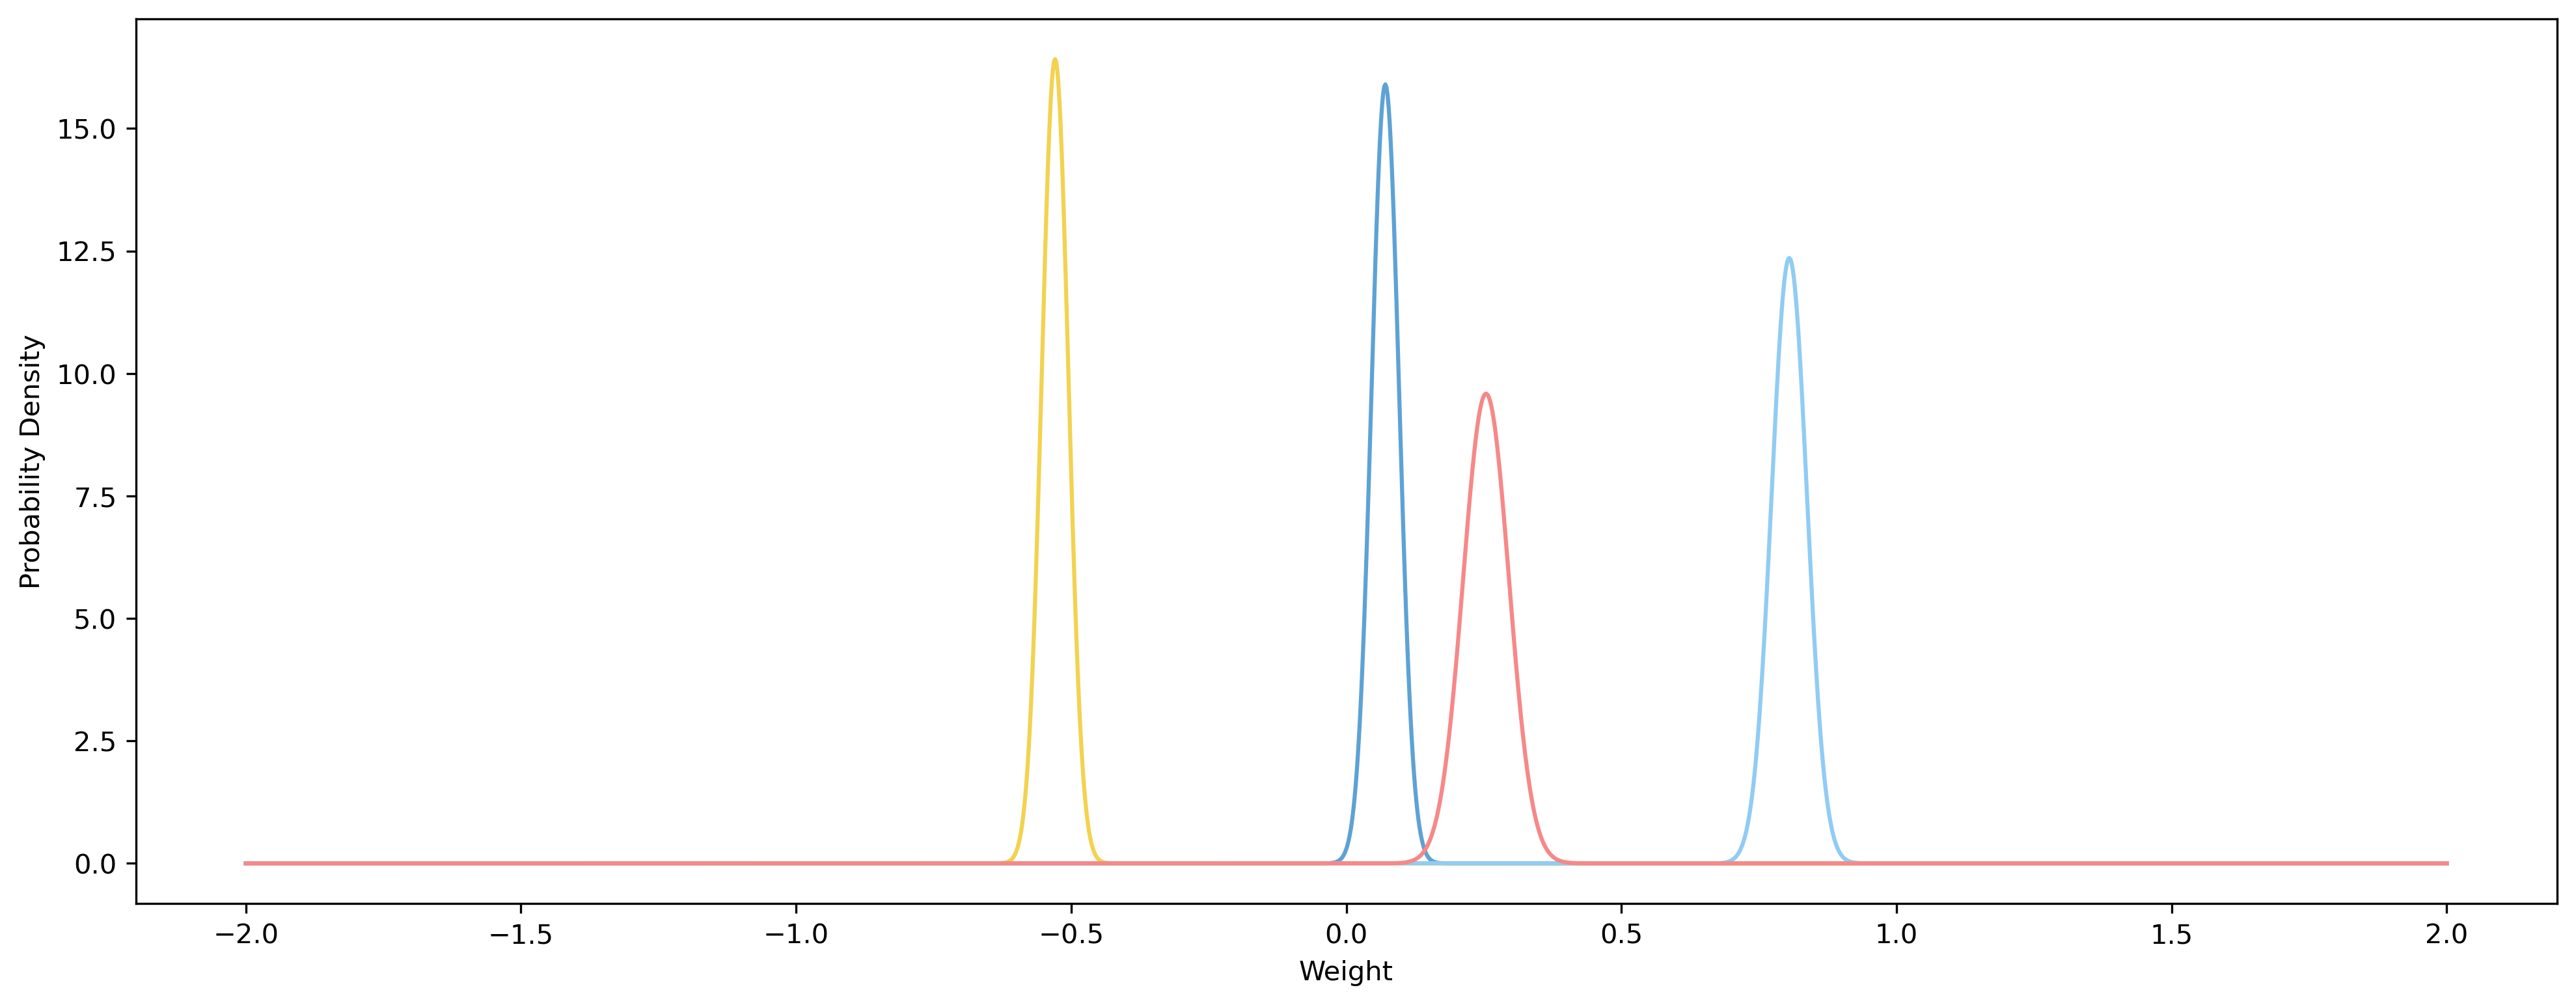

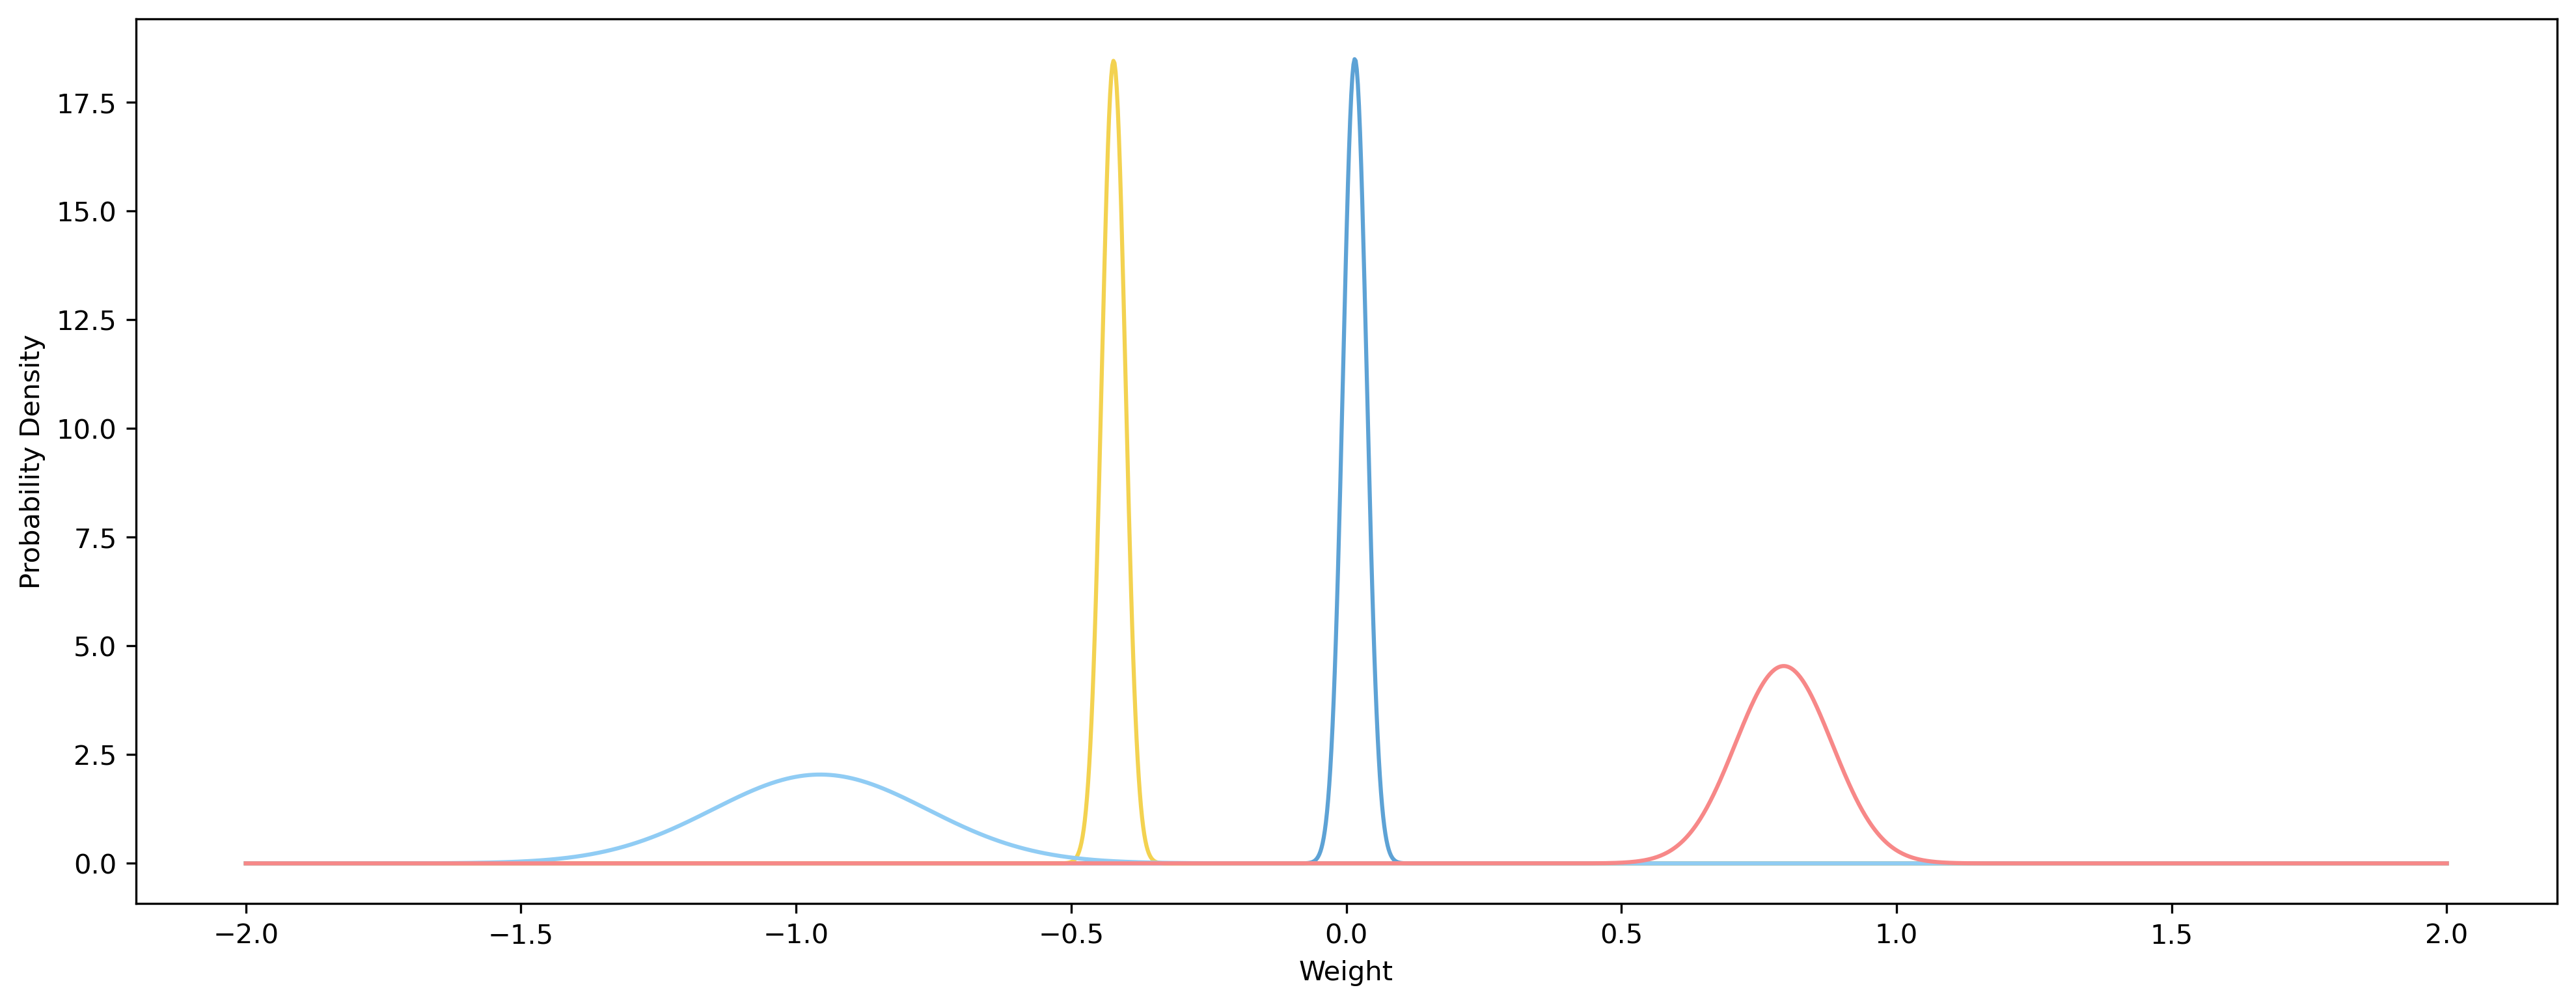

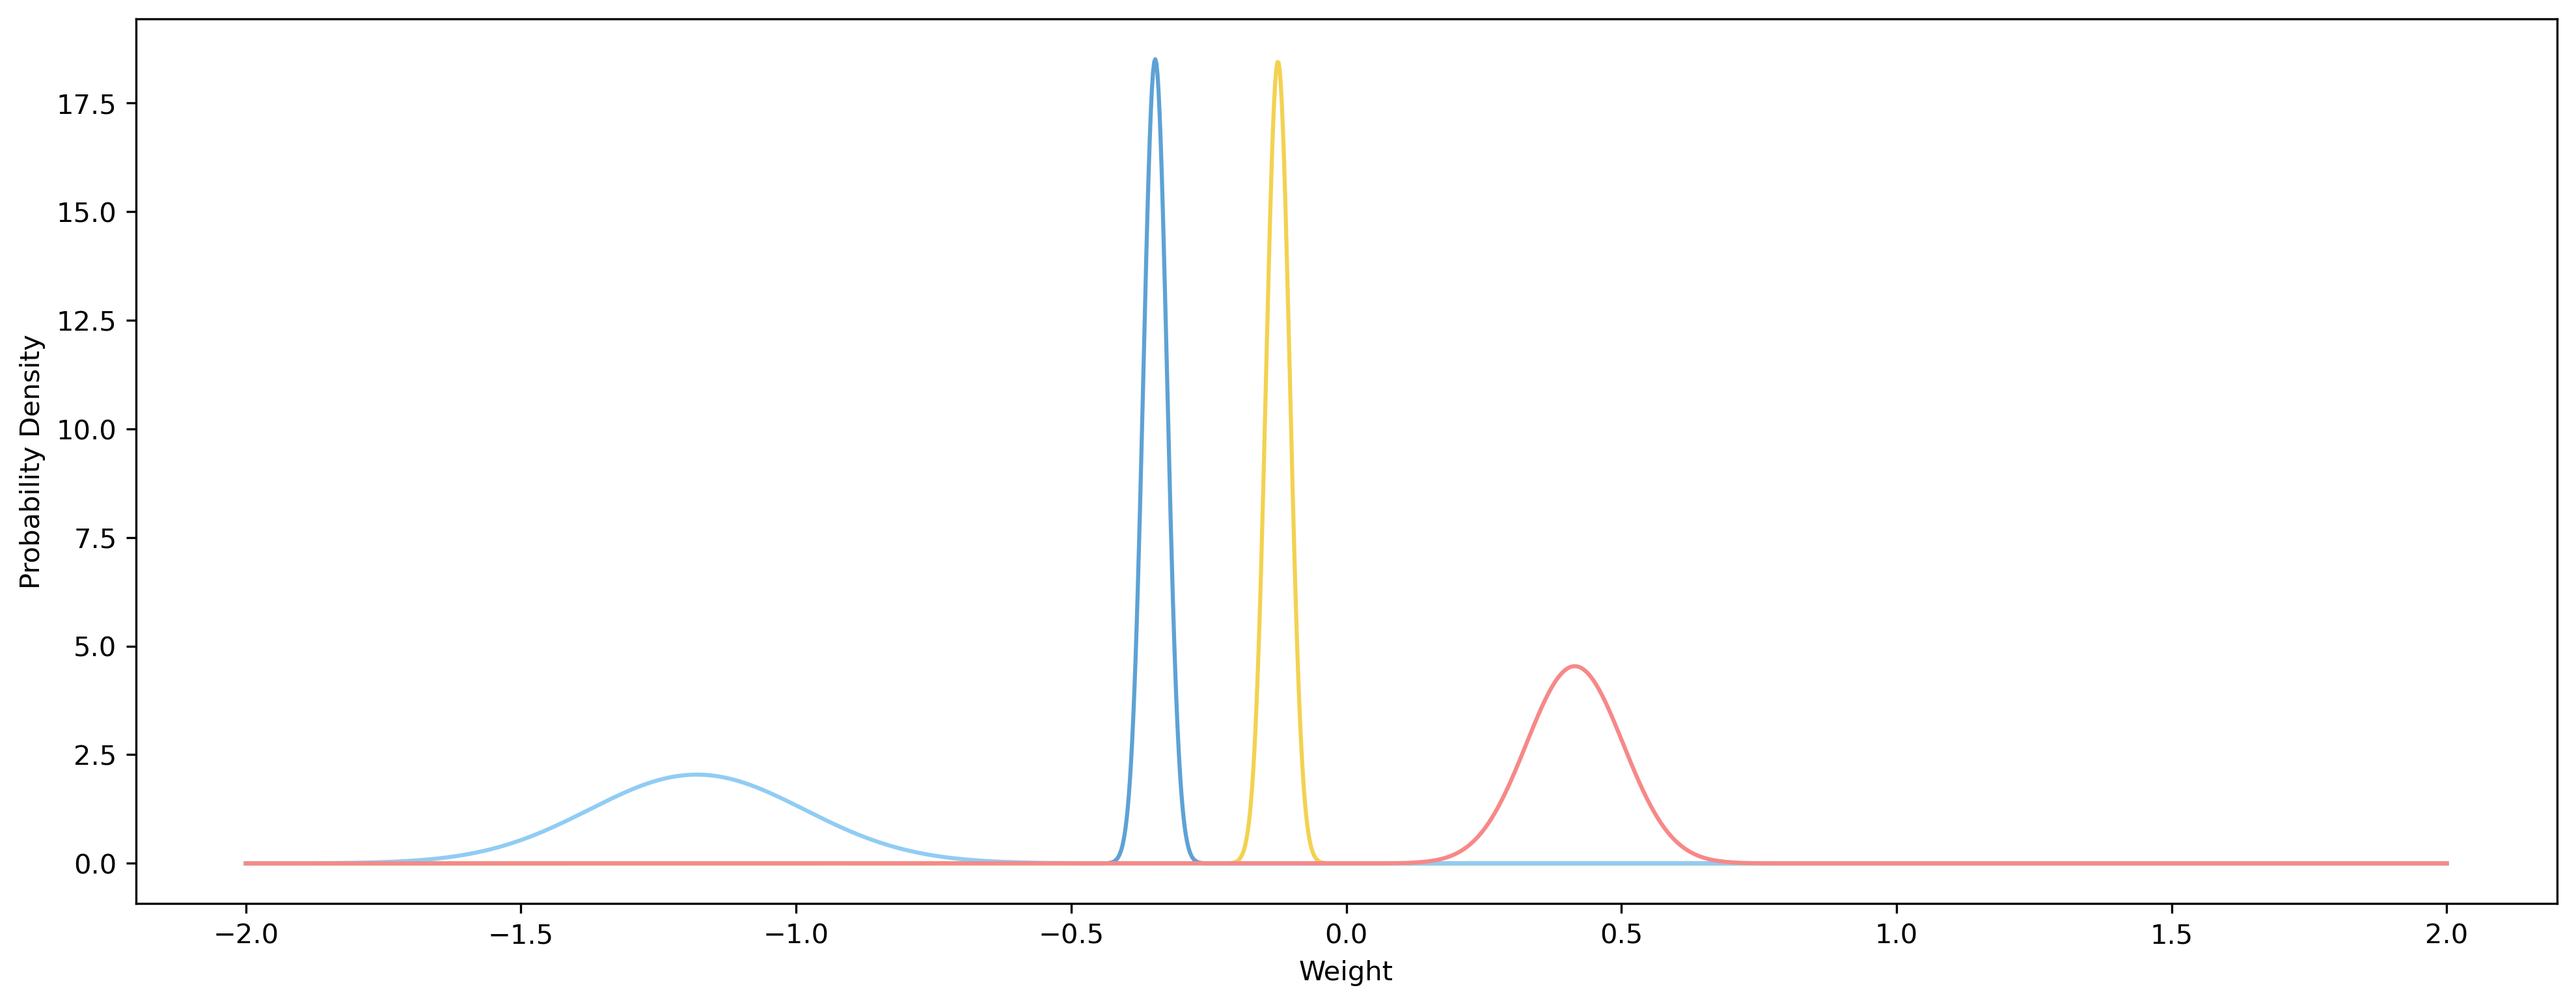

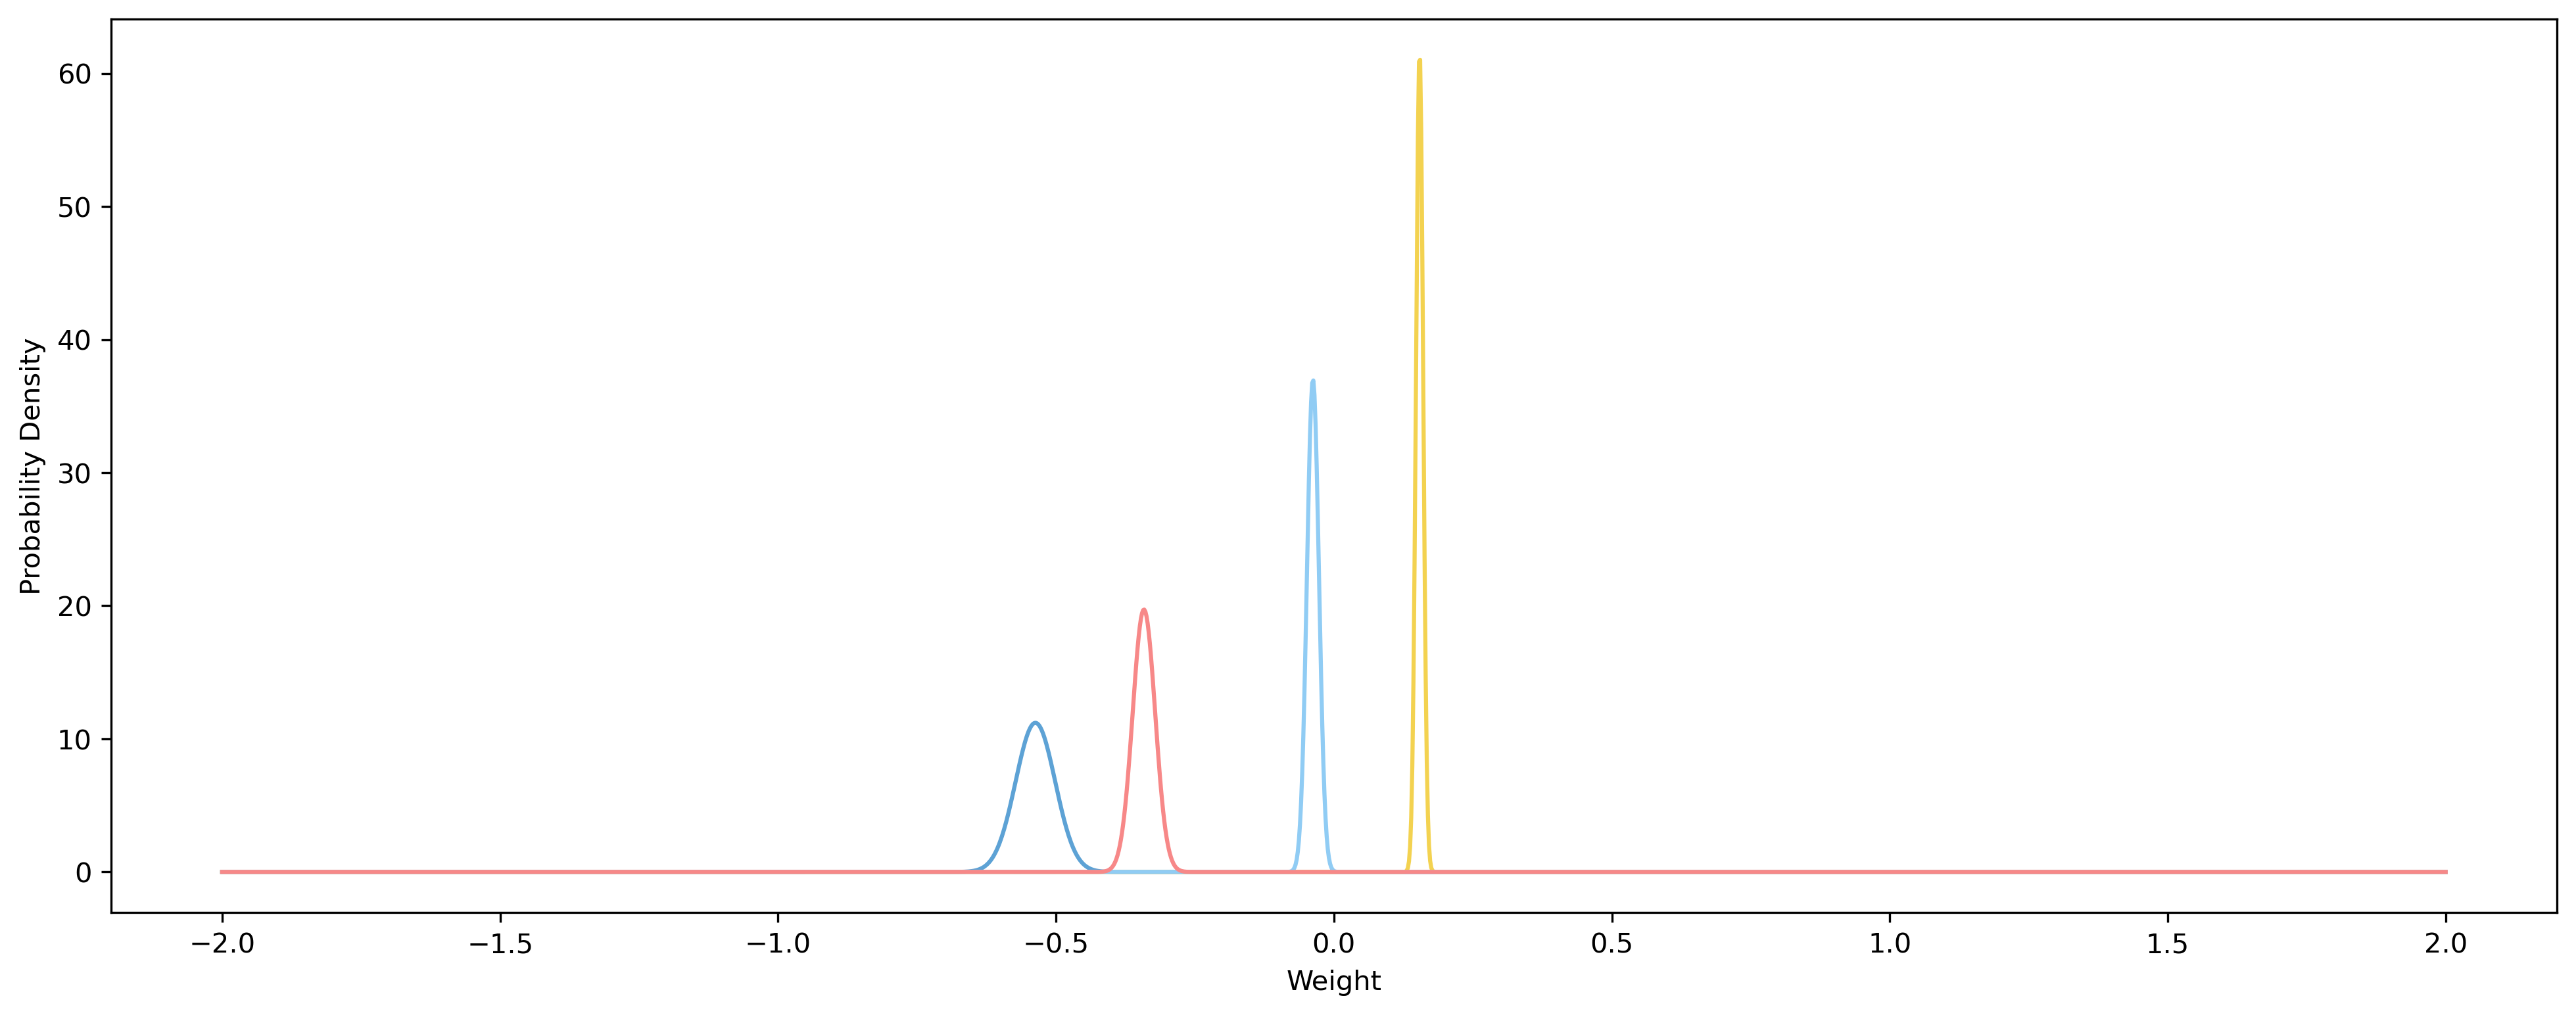

In [29]:
for group in groups:
    plot_pds(group)

## Evaluating the Probability Densities

In [30]:
def get_probs(group):
    domain = np.linspace(-2,2,1000)
    means = [mean(group[0]), mean(group[1]), mean(group[2]), mean(group[3])]
    stds = [stdev(group[0]), stdev(group[1]), stdev(group[2]), stdev(group[3])]
    results = []
    for mu, std in zip(means, stds):
        if std:
            try:
                values = []
                probs = norm.pdf(domain, mu, std)
                for prob in probs:
                    if math.floor(prob) != 0:
                        values.append(prob)
                results.append(values)
            except ValueError:
                pass
    
    return results

In [31]:
all_probs = [get_probs(group) for group in groups]

In [32]:
def barrage(all_probs, nodes: int):
    res = {
        i: {"len": 0, "max": 0, "sum": 0, "mean": 0, "stdev": 0} for i in range(nodes)
    }
    for probs in all_probs:
        for i, prob in enumerate(probs):
            res[i]["len"] += len(prob)
            res[i]["max"] += max(prob)
            res[i]["sum"] += sum(prob)
            res[i]["mean"] += mean(prob)
            res[i]["stdev"] += stdev(prob)
    return res

In [33]:
columns = ["ms", "xs", "cs", "noises"]

res = barrage(all_probs, len(columns))
for i in range(len(columns)):
    res[columns[i]] = res.pop(i)
df = pd.DataFrame(res)
df

,ms,xs,cs,noises
len,120.000000,90.000000,285.000000,224.000000
max,64.020147,114.903484,53.411830,38.370763
sum,978.923444,985.599939,876.151733,948.360658
mean,33.566561,54.990742,26.610205,21.209987
stdev,20.914239,40.062311,17.705351,11.924624


In [34]:
def plot_barrage(method: str):
    cdict = {"ms": light, "xs": important, "cs": darker, "noises": noise}
    data = pd.Series(df.loc[method], df.columns).sort_values(ascending=True)
    cmap = [cdict[i] for i in list(data.index.values)]
    ax = data.plot.barh(width=0.8, figsize=(3, 1), color=cmap)
    ax.set_ylabel("Input")
    ax.set_xlabel(method.capitalize())

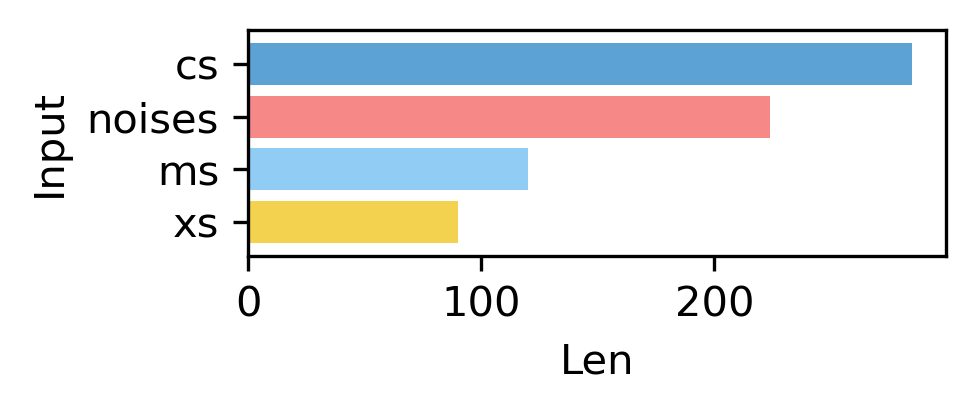

In [35]:
plot_barrage("len")

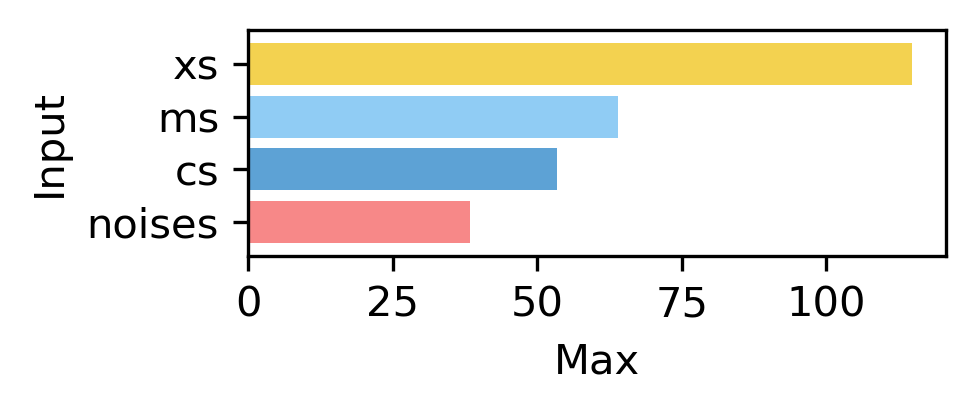

In [36]:
plot_barrage("max")

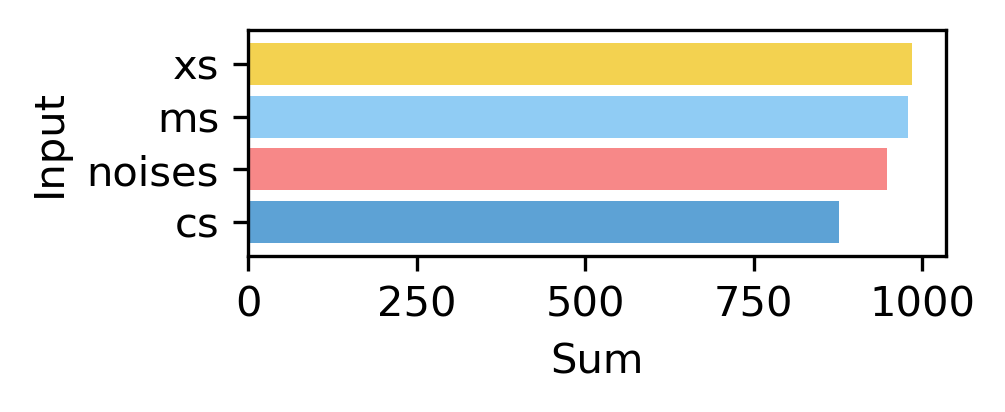

In [37]:
plot_barrage("sum")

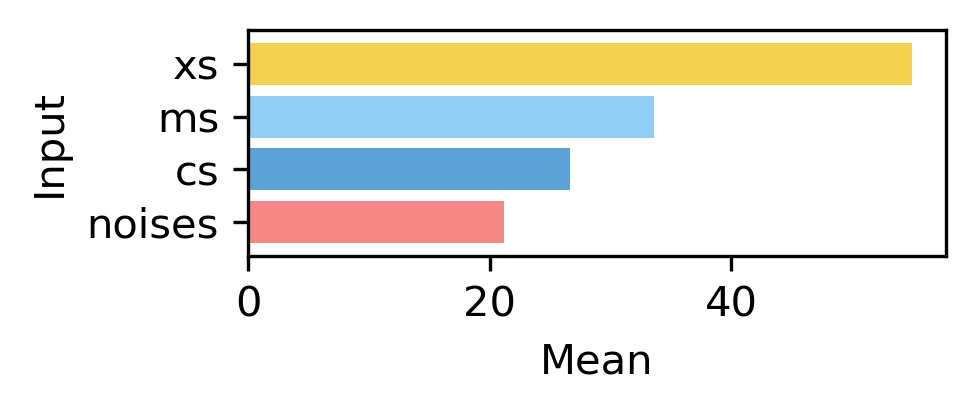

In [38]:
plot_barrage("mean")

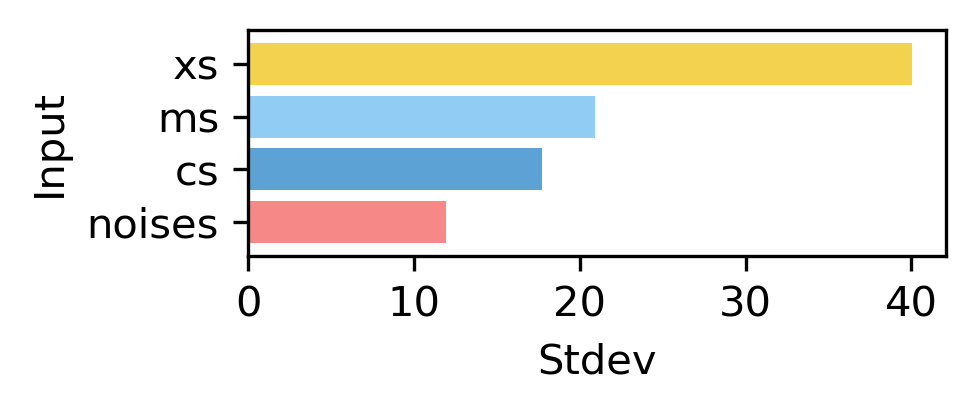

In [39]:
plot_barrage("stdev")